<a href="https://colab.research.google.com/github/uvdhatri/codeclause-tasks/blob/main/customer_purchase_data_codeclause.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Generate a Synthetic Dataset
For the purpose of this demonstration, let's create a synthetic dataset. You can replace this with your actual customer purchase dataset.

In [1]:
import numpy as np
import pandas as pd

# Generating synthetic data
np.random.seed(42)

# Create a dataframe with customer information
customer_data = pd.DataFrame({
    'CustomerID': range(1, 101),
    'Age': np.random.randint(18, 65, 100),
    'Income': np.random.randint(30000, 90000, 100),
    'SpendingScore': np.random.randint(1, 101, 100)
})

# Display the first few rows of the dataset
print(customer_data.head())


   CustomerID  Age  Income  SpendingScore
0           1   56   32695             77
1           2   46   88839              3
2           3   32   78190             70
3           4   60   35258             72
4           5   25   52002             27


Step 2: Explore the Data
Explore the dataset to understand its structure and characteristics.

       CustomerID        Age        Income  SpendingScore
count  100.000000  100.00000    100.000000     100.000000
mean    50.500000   40.88000  61215.360000      50.080000
std     29.011492   13.99082  17793.374502      30.836382
min      1.000000   18.00000  30206.000000       1.000000
25%     25.750000   30.50000  46075.250000      22.250000
50%     50.500000   41.00000  59901.500000      52.500000
75%     75.250000   53.25000  78072.250000      73.500000
max    100.000000   64.00000  89581.000000      99.000000


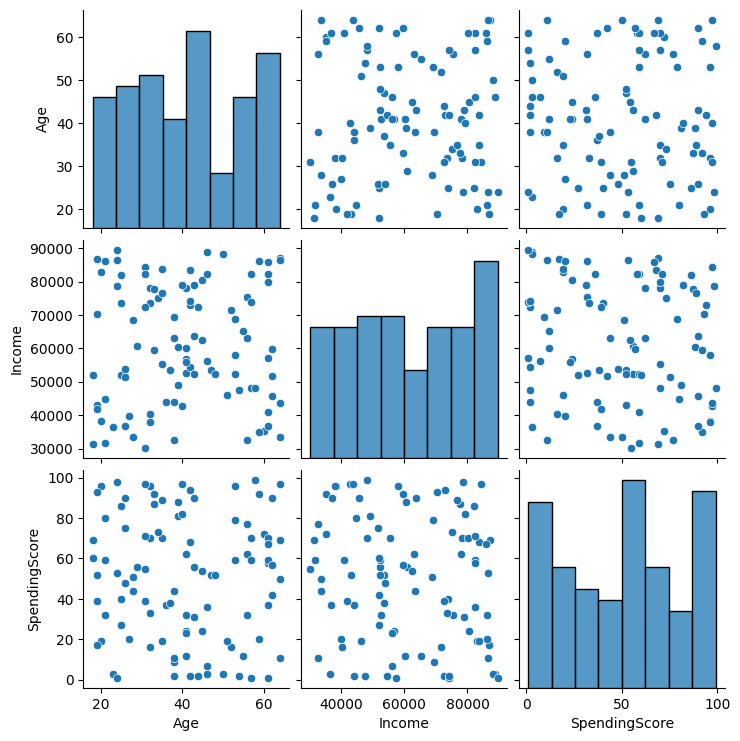

In [2]:
# Display summary statistics
print(customer_data.describe())

# Visualize the data (scatter plots, histograms, etc.)
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(customer_data[['Age', 'Income', 'SpendingScore']])
plt.show()

Step 3: Preprocess the Data
Handle any missing values and scale the features if necessary.

In [3]:
# Check for missing values
print(customer_data.isnull().sum())

# No missing values, so scaling is not necessary for this example.


CustomerID       0
Age              0
Income           0
SpendingScore    0
dtype: int64


Step 4: Choose the Number of Clusters (K)
Use the Elbow Method to determine the optimal number of clusters.

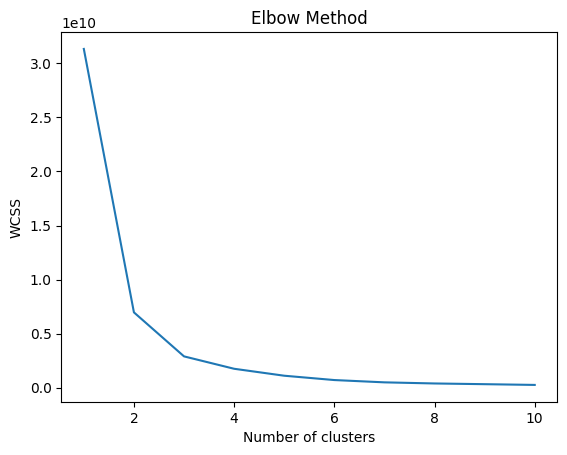

In [4]:
from sklearn.cluster import KMeans

# Selecting the features for clustering
X = customer_data[['Age', 'Income', 'SpendingScore']]

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()


Step 5: Apply K-Means Clustering
Apply the K-Means algorithm with the chosen number of clusters.

In [6]:
# Fit K-Means to the data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X)

Step 6: Analyze the Results
Analyze and interpret the clusters.

         Age        Income  SpendingScore
0  40.166667  79488.261905      46.809524
1  38.730769  38455.538462      56.115385
2  43.562500  55724.531250      49.468750


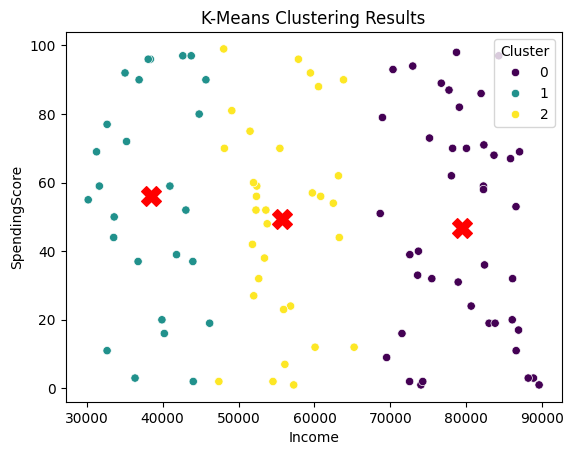

In [7]:
# Display the centroids of each cluster
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'Income', 'SpendingScore'])
print(centroids)

# Visualize the clusters
sns.scatterplot(data=customer_data, x='Income', y='SpendingScore', hue='Cluster', palette='viridis')
plt.scatter(centroids['Income'], centroids['SpendingScore'], marker='X', s=200, color='red')
plt.title('K-Means Clustering Results')
plt.show()


Step 7: Conclusion and Insights
Summarize the findings and draw insights from the clustering results.

This provides a basic structure for applying K-Means clustering to segment customers based on their purchase behavior.